In [1]:
import numpy as np
import psrchive as psr
import matplotlib.pyplot as plt
import os
import astropy.stats as ast
from astropy.utils import NumpyRNGContext
import scipy.stats as scs
%matplotlib notebook

## 4Pulse integrated

In [2]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/4pul_Integrated/')

ar_4p=psr.Archive_load("pulse_8984615452_Lband.paz.XP.it")
ar_4p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_4p
ar_4p.dedisperse()
ar_4p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_4p=ar_4p.get_data()
dim_4p=data_4p.shape

In [3]:
##################################################################################################################################################
## The current data_4p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_4p=np.ndarray([dim_4p[0],dim_4p[2]])
           ## Calculating baseline_4p as a function of frequency from data_4p######
for k in range(dim_4p[2]):
    for i in range(dim_4p[0]):
        baseline_4p[i,k]=np.mean(data_4p[i,0,k,800:1020])

In [4]:
## Removing baseline form data_4p
data_4p_baseline_removed=np.ndarray([dim_4p[0],dim_4p[2],dim_4p[3]])
for i in range(dim_4p[0]):
    for j in range(dim_4p[2]):
        data_4p_baseline_removed[i,j,:]=np.add(np.subtract(data_4p[i,0,j,:],baseline_4p[i,j]),1)

In [5]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_4p=np.ndarray([dim_4p[0],dim_4p[2]])

for i in range(dim_4p[0]):
    for j in range(dim_4p[2]):
        Ener_main_comp_4p[i,j]=np.divide(np.sum(data_4p[i,pol,j,300:420]-np.mean(data_4p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_4p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_4p_noise=np.ndarray([dim_4p[0],dim_4p[2]])

for i in range(dim_4p[0]):
    for j in range(dim_4p[2]):
        Ener_main_comp_4p_noise[i,j]=np.divide(np.sum(data_4p[i,pol,j,650:770]-np.mean(data_4p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_4p[i,pol,j,800:1020])))


plt.figure()
#plt.plot(np.log10(Ener_main_comp_4p[:,0])-np.mean(np.log10(Ener_main_comp_4p[:,0])))#-np.mean(Ener_main_comp_4p[:,0]))
#plt.plot(np.log10(Ener_main_comp_4p[:,26])-np.mean(np.log10(Ener_main_comp_4p[:,26])))#-np.mean(Ener_main_comp_4p[:,26]))
plt.plot((Ener_main_comp_4p[:,0])-np.mean((Ener_main_comp_4p[:,0])))
plt.plot((Ener_main_comp_4p[:,31])-np.mean((Ener_main_comp_4p[:,31])))#-np.mean(Ener_main_comp_4p[:,26]))
#plt.plot(np.log10(Ener_main_comp_4p[:,30])-np.mean(np.log10(Ener_main_comp_4p[:,30])))#-np.mean(Ener_main_comp_4p[:,30]))
plt.hlines([0],0,350)
plt.figure()
plt.plot(np.correlate(Ener_main_comp_4p[:,31]-np.mean(Ener_main_comp_4p[:,31]),Ener_main_comp_4p[:,31]-np.mean(Ener_main_comp_4p[:,31]),"full"))
plt.figure()
plt.plot(np.correlate(Ener_main_comp_4p_noise[:,31]-np.mean(Ener_main_comp_4p_noise[:,31]),Ener_main_comp_4p_noise[:,31]-np.mean(Ener_main_comp_4p_noise[:,31]),"full"))
plt.figure()
plt.hist(np.log10(Ener_main_comp_4p[:,0]),bins=50)

<IPython.core.display.Javascript object>


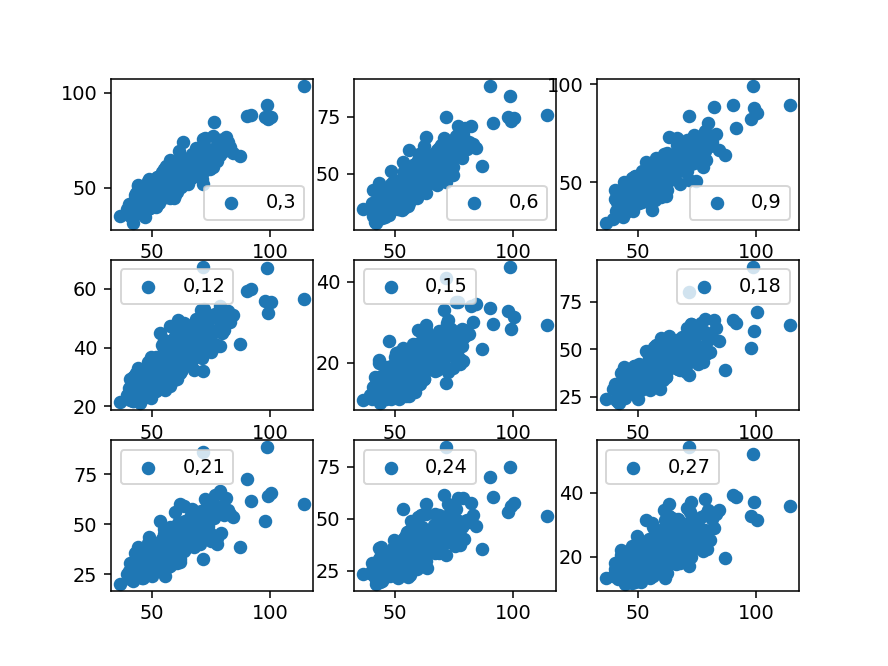

<IPython.core.display.Javascript object>


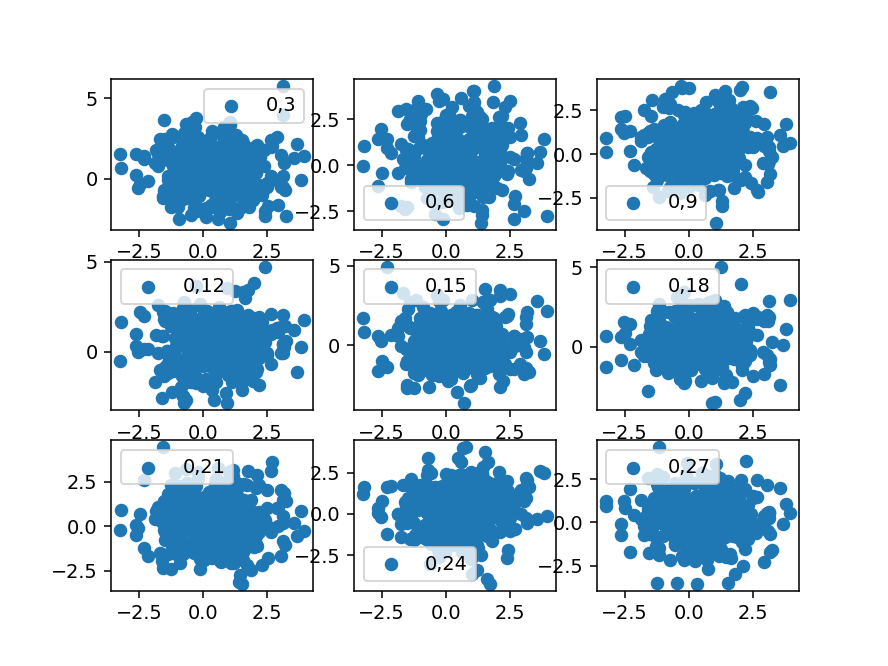

In [6]:
####### Scatter Plots of Energies############
Fig_4p, Axs_4p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_4p[r,j].scatter(Ener_main_comp_4p[:,0],Ener_main_comp_4p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_4p[r,j].legend()


Fig_4p1, Axs_4p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_4p1[r,j].scatter(Ener_main_comp_4p_noise[:,0],Ener_main_comp_4p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_4p1[r,j].legend()



In [7]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_4p=np.ndarray([dim_4p[2],dim_4p[2]])

R_pear_Ener_main_4p=np.corrcoef(Ener_main_comp_4p,rowvar=False)


### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_4p=np.ndarray([dim_4p[2],dim_4p[2]])
R_Spear_pval_Ener_main_4p=np.ndarray([dim_4p[2],dim_4p[2]])
R_Spear_Ener_main_4p=scs.spearmanr(Ener_main_comp_4p,axis=0)[0]
R_Spear_pval_Ener_main_4p=scs.spearmanr(Ener_main_comp_4p,axis=0)[1]

plt.figure()
plt.plot(R_pear_Ener_main_4p[0,:])
plt.plot(R_Spear_Ener_main_4p[0,:])

### CALCULATING MODULATION INDEX

In [8]:
modIndex_4p=np.ndarray([dim_4p[2],dim_4p[3]])
for i in range(dim_4p[2]):
    for j in range(dim_4p[3]):
        modIndex_4p[i,j]=np.divide(np.sqrt(np.var(data_4p_baseline_removed[:,i,j])-np.mean(np.var(data_4p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_4p_baseline_removed[:,i,j]))


/tmp/ipykernel_13580/2645275828.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_4p[i,j]=np.divide(np.sqrt(np.var(data_4p_baseline_removed[:,i,j])-np.mean(np.var(data_4p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_4p_baseline_removed[:,i,j]))


In [9]:
print(dim_4p)

(348, 1, 32, 1024)


##### Bootstrap for 4pulse

In [10]:
with NumpyRNGContext(1):   
    bootresult_4p = ast.bootstrap(Ener_main_comp_4p, 500)
    
R_Spear_Ener_main_4p_boot=np.ndarray([bootresult_4p.shape[0],bootresult_4p.shape[2],bootresult_4p.shape[2]])
for i in range(bootresult_4p.shape[0]):
    R_Spear_Ener_main_4p_boot[i,:,:]=scs.spearmanr(bootresult_4p[i,:,:],axis=0)[0]

<IPython.core.display.Javascript object>


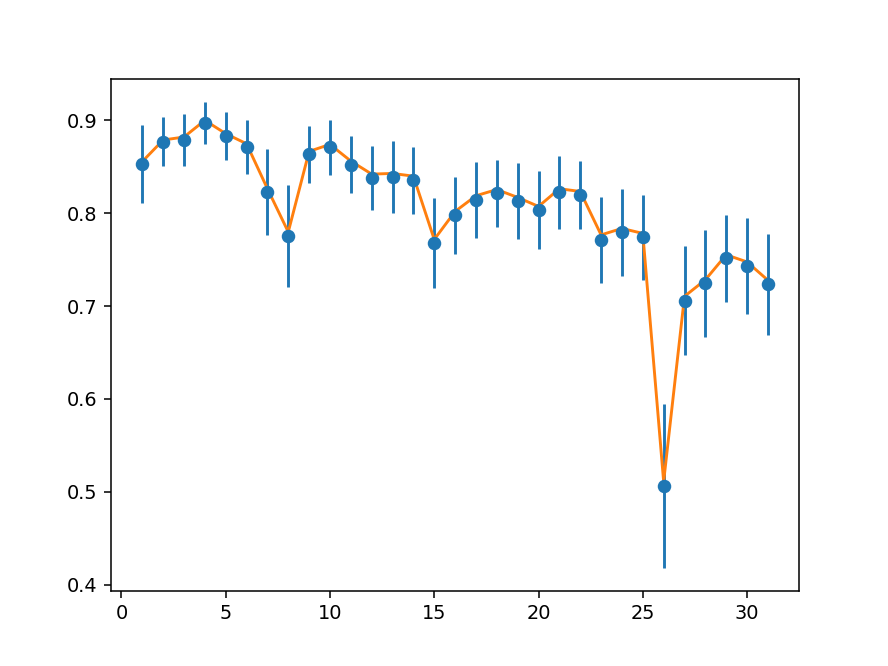

In [12]:
plt.figure()
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_4p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_4p_boot[:,0,1:32],axis=0)),fmt='o',label='4p')
plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_4p[0,1:32],label='4p')

## 8pulse integrated

In [10]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/8pul_Integrated/')

ar_8p=psr.Archive_load("pulse_8984615452_Lband.paz.XP.it")
ar_8p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_8p
ar_8p.dedisperse()
ar_8p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_8p=ar_8p.get_data()
dim_8p=data_8p.shape

In [11]:
##################################################################################################################################################
## The current data_8p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_8p=np.ndarray([dim_8p[0],dim_8p[2]])
           ## Calculating baseline_8p as a function of frequency from data_8p######
for k in range(dim_8p[2]):
    for i in range(dim_8p[0]):
        baseline_8p[i,k]=np.mean(data_8p[i,0,k,800:1020])

In [12]:
## Removing baseline form data_8p
data_8p_baseline_removed=np.ndarray([dim_8p[0],dim_8p[2],dim_8p[3]])
for i in range(dim_8p[0]):
    for j in range(dim_8p[2]):
        data_8p_baseline_removed[i,j,:]=np.add(np.subtract(data_8p[i,0,j,:],baseline_8p[i,j]),1)

In [13]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_8p=np.ndarray([dim_8p[0],dim_8p[2]])

for i in range(dim_8p[0]):
    for j in range(dim_8p[2]):
        Ener_main_comp_8p[i,j]=np.divide(np.sum(data_8p[i,pol,j,300:420]-np.mean(data_8p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_8p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_8p_noise=np.ndarray([dim_8p[0],dim_8p[2]])

for i in range(dim_8p[0]):
    for j in range(dim_8p[2]):
        Ener_main_comp_8p_noise[i,j]=np.divide(np.sum(data_8p[i,pol,j,650:770]-np.mean(data_8p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_8p[i,pol,j,800:1020])))


plt.figure()
plt.plot(np.log10(Ener_main_comp_8p[:,0])-np.mean(np.log10(Ener_main_comp_8p[:,0])))#-np.mean(Ener_main_comp_8p[:,0]))
plt.plot(np.log10(Ener_main_comp_8p[:,9])-np.mean(np.log10(Ener_main_comp_8p[:,9])))#-np.mean(Ener_main_comp_8p[:,9]))
plt.plot(np.log10(Ener_main_comp_8p[:,30])-np.mean(np.log10(Ener_main_comp_8p[:,30])))#-np.mean(Ener_main_comp_8p[:,30]))
plt.hlines([0],0,175)
plt.figure()
plt.plot(np.correlate(Ener_main_comp_8p[:,3]-np.mean(Ener_main_comp_8p[:,3]),Ener_main_comp_8p[:,3]-np.mean(Ener_main_comp_8p[:,3]),"full"))
plt.figure()
plt.plot(np.correlate(Ener_main_comp_8p_noise[:,3]-np.mean(Ener_main_comp_8p_noise[:,3]),Ener_main_comp_8p_noise[:,3]-np.mean(Ener_main_comp_8p_noise[:,3]),"full"))
plt.figure()
plt.hist(np.log10(Ener_main_comp_8p[:,0]),bins=50)

<IPython.core.display.Javascript object>


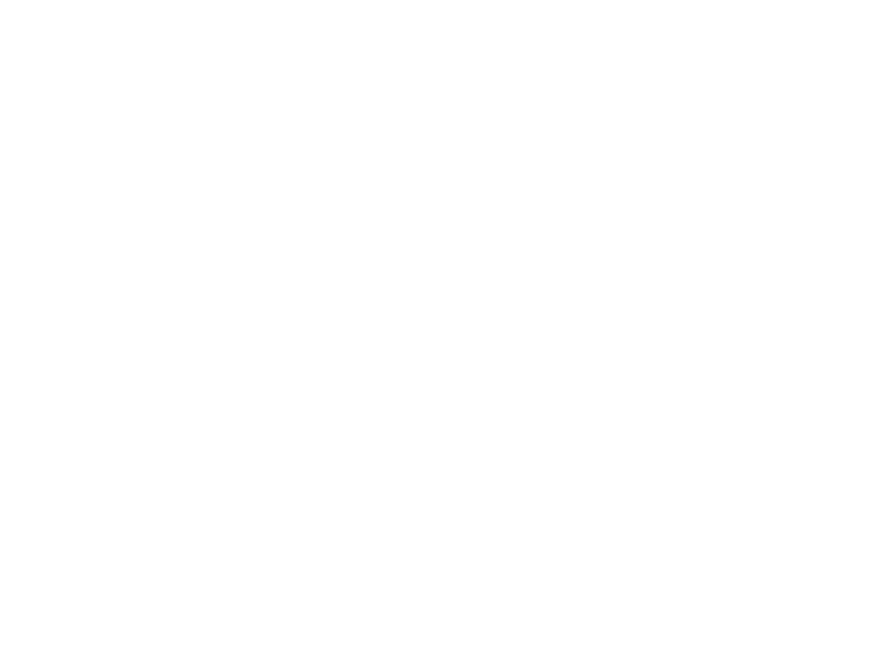

<IPython.core.display.Javascript object>


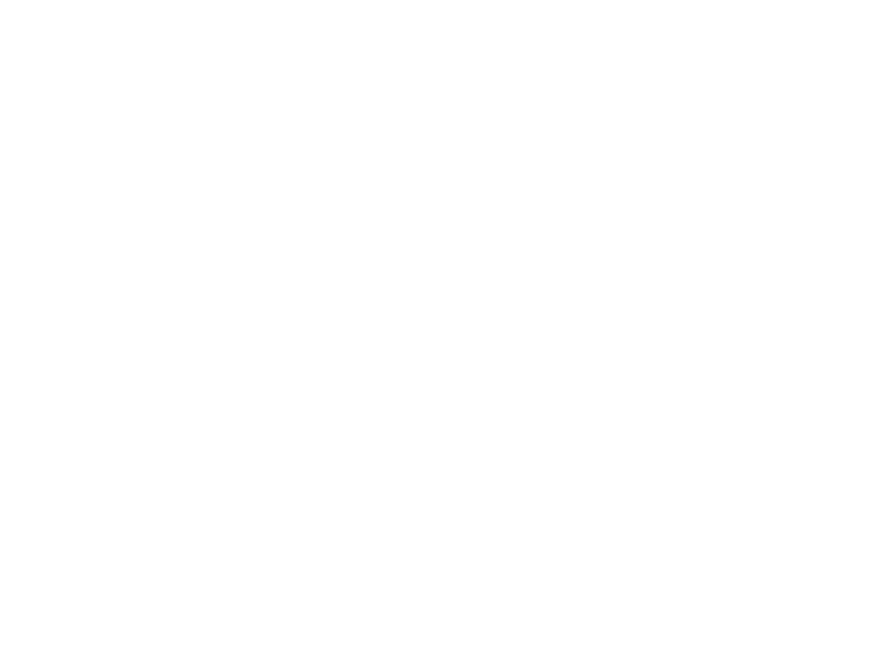

In [14]:
####### Scatter Plots of Energies############
Fig_8p, Axs_8p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_8p[r,j].scatter(Ener_main_comp_8p[:,0],Ener_main_comp_8p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_8p[r,j].legend()


Fig_8p1, Axs_8p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_8p1[r,j].scatter(Ener_main_comp_8p_noise[:,0],Ener_main_comp_8p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_8p1[r,j].legend()



In [15]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_8p=np.ndarray([dim_8p[2],dim_8p[2]])

R_pear_Ener_main_8p=np.corrcoef(Ener_main_comp_8p,rowvar=False)


### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_8p=np.ndarray([dim_8p[2],dim_8p[2]])
R_Spear_pval_Ener_main_8p=np.ndarray([dim_8p[2],dim_8p[2]])
R_Spear_Ener_main_8p=scs.spearmanr(Ener_main_comp_8p,axis=0)[0]
R_Spear_pval_Ener_main_8p=scs.spearmanr(Ener_main_comp_8p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [16]:
modIndex_8p=np.ndarray([dim_8p[2],dim_8p[3]])
for i in range(dim_8p[2]):
    for j in range(dim_8p[3]):
        modIndex_8p[i,j]=np.divide(np.sqrt(np.var(data_8p_baseline_removed[:,i,j])-np.mean(np.var(data_8p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_8p_baseline_removed[:,i,j]))


/tmp/ipykernel_2411/2553787323.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_8p[i,j]=np.divide(np.sqrt(np.var(data_8p_baseline_removed[:,i,j])-np.mean(np.var(data_8p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_8p_baseline_removed[:,i,j]))


## 16pulse integrated

In [16]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/16pul_Integrated/')

ar_16p=psr.Archive_load("pulse_8984615452_Lband.paz.XP.it")
ar_16p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_16p
ar_16p.dedisperse()
ar_16p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_16p=ar_16p.get_data()
dim_16p=data_16p.shape

In [17]:
##################################################################################################################################################
## The current data_16p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_16p=np.ndarray([dim_16p[0],dim_16p[2]])
           ## Calculating baseline_16p as a function of frequency from data_16p######
for k in range(dim_16p[2]):
    for i in range(dim_16p[0]):
        baseline_16p[i,k]=np.mean(data_16p[i,0,k,800:1020])

In [18]:
## Removing baseline form data_16p
data_16p_baseline_removed=np.ndarray([dim_16p[0],dim_16p[2],dim_16p[3]])
for i in range(dim_16p[0]):
    for j in range(dim_16p[2]):
        data_16p_baseline_removed[i,j,:]=np.add(np.subtract(data_16p[i,0,j,:],baseline_16p[i,j]),1)

In [19]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_16p=np.ndarray([dim_16p[0],dim_16p[2]])

for i in range(dim_16p[0]):
    for j in range(dim_16p[2]):
        Ener_main_comp_16p[i,j]=np.divide(np.sum(data_16p[i,pol,j,300:420]-np.mean(data_16p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_16p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_16p_noise=np.ndarray([dim_16p[0],dim_16p[2]])

for i in range(dim_16p[0]):
    for j in range(dim_16p[2]):
        Ener_main_comp_16p_noise[i,j]=np.divide(np.sum(data_16p[i,pol,j,650:770]-np.mean(data_16p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_16p[i,pol,j,800:1020])))


plt.figure()
plt.plot(Ener_main_comp_16p[:,0]-np.mean(Ener_main_comp_16p[:,0]))
plt.plot(Ener_main_comp_16p[:,9]-np.mean(Ener_main_comp_16p[:,9]))
plt.plot(Ener_main_comp_16p[:,30]-np.mean(Ener_main_comp_16p[:,30]))
plt.hlines([0],0,90)

<IPython.core.display.Javascript object>


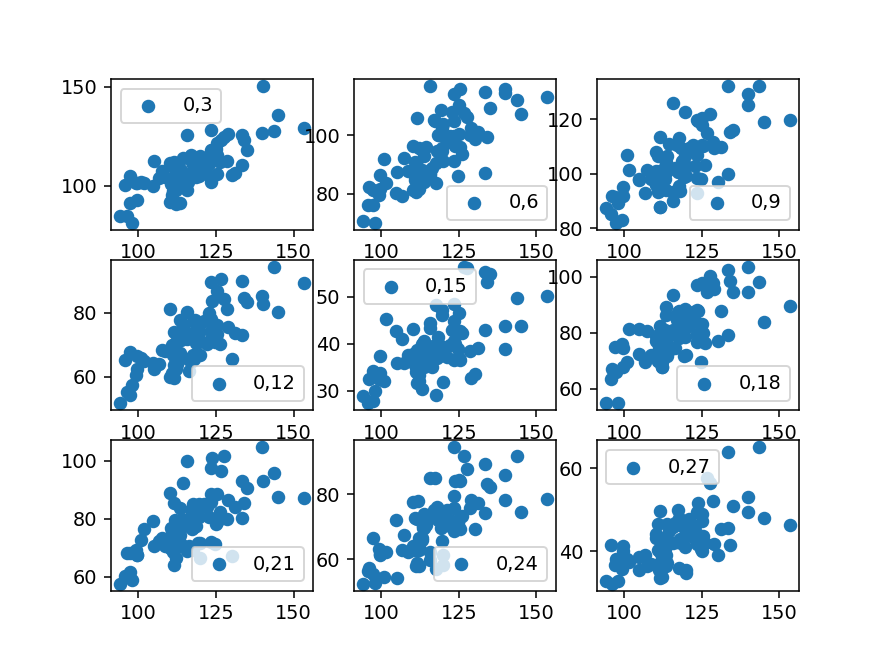

<IPython.core.display.Javascript object>


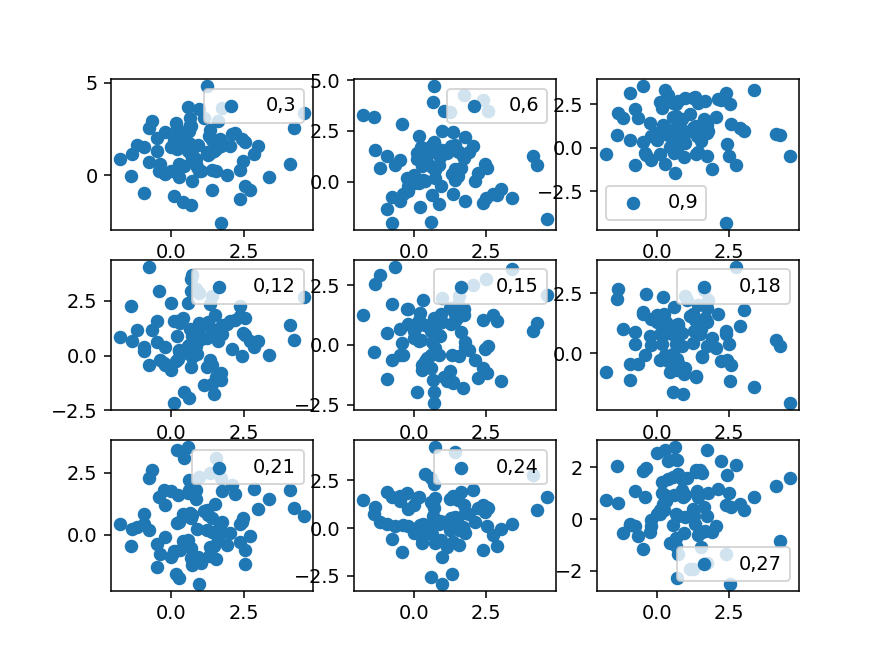

In [20]:
####### Scatter Plots of Energies############
Fig_16p, Axs_16p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_16p[r,j].scatter(Ener_main_comp_16p[:,0],Ener_main_comp_16p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_16p[r,j].legend()


Fig_16p1, Axs_16p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_16p1[r,j].scatter(Ener_main_comp_16p_noise[:,0],Ener_main_comp_16p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_16p1[r,j].legend()



In [21]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_16p=np.ndarray([dim_16p[2],dim_16p[2]])

R_pear_Ener_main_16p=np.corrcoef(Ener_main_comp_16p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_16p=np.ndarray([dim_16p[2],dim_16p[2]])
R_Spear_pval_Ener_main_16p=np.ndarray([dim_16p[2],dim_16p[2]])
R_Spear_Ener_main_16p=scs.spearmanr(Ener_main_comp_16p,axis=0)[0]
R_Spear_pval_Ener_main_16p=scs.spearmanr(Ener_main_comp_16p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [22]:
modIndex_16p=np.ndarray([dim_16p[2],dim_16p[3]])
for i in range(dim_16p[2]):
    for j in range(dim_16p[3]):
        modIndex_16p[i,j]=np.divide(np.sqrt(np.var(data_16p_baseline_removed[:,i,j])-np.mean(np.var(data_16p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_16p_baseline_removed[:,i,j]))


/tmp/ipykernel_13580/778894977.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_16p[i,j]=np.divide(np.sqrt(np.var(data_16p_baseline_removed[:,i,j])-np.mean(np.var(data_16p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_16p_baseline_removed[:,i,j]))


##### Bootstrap for 16pulse

In [23]:
with NumpyRNGContext(1):   
    bootresult_16p = ast.bootstrap(Ener_main_comp_16p, 500)
    
R_Spear_Ener_main_16p_boot=np.ndarray([bootresult_16p.shape[0],bootresult_16p.shape[2],bootresult_16p.shape[2]])
for i in range(bootresult_16p.shape[0]):
    R_Spear_Ener_main_16p_boot[i,:,:]=scs.spearmanr(bootresult_16p[i,:,:],axis=0)[0]

## 32pulse integrated

In [24]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/32pul_Integrated/')

ar_32p=psr.Archive_load("pulse_8984615452_Lband.paz.XP.it")
ar_32p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_32p
ar_32p.dedisperse()
ar_32p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_32p=ar_32p.get_data()
dim_32p=data_32p.shape

In [25]:
##################################################################################################################################################
## The current data_32p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_32p=np.ndarray([dim_32p[0],dim_32p[2]])
           ## Calculating baseline_32p as a function of frequency from data_32p######
for k in range(dim_32p[2]):
    for i in range(dim_32p[0]):
        baseline_32p[i,k]=np.mean(data_32p[i,0,k,800:1020])

In [26]:
## Removing baseline form data_32p
data_32p_baseline_removed=np.ndarray([dim_32p[0],dim_32p[2],dim_32p[3]])
for i in range(dim_32p[0]):
    for j in range(dim_32p[2]):
        data_32p_baseline_removed[i,j,:]=np.add(np.subtract(data_32p[i,0,j,:],baseline_32p[i,j]),1)

In [27]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_32p=np.ndarray([dim_32p[0],dim_32p[2]])

for i in range(dim_32p[0]):
    for j in range(dim_32p[2]):
        Ener_main_comp_32p[i,j]=np.divide(np.sum(data_32p[i,pol,j,300:420]-np.mean(data_32p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_32p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_32p_noise=np.ndarray([dim_32p[0],dim_32p[2]])

for i in range(dim_32p[0]):
    for j in range(dim_32p[2]):
        Ener_main_comp_32p_noise[i,j]=np.divide(np.sum(data_32p[i,pol,j,650:770]-np.mean(data_32p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_32p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


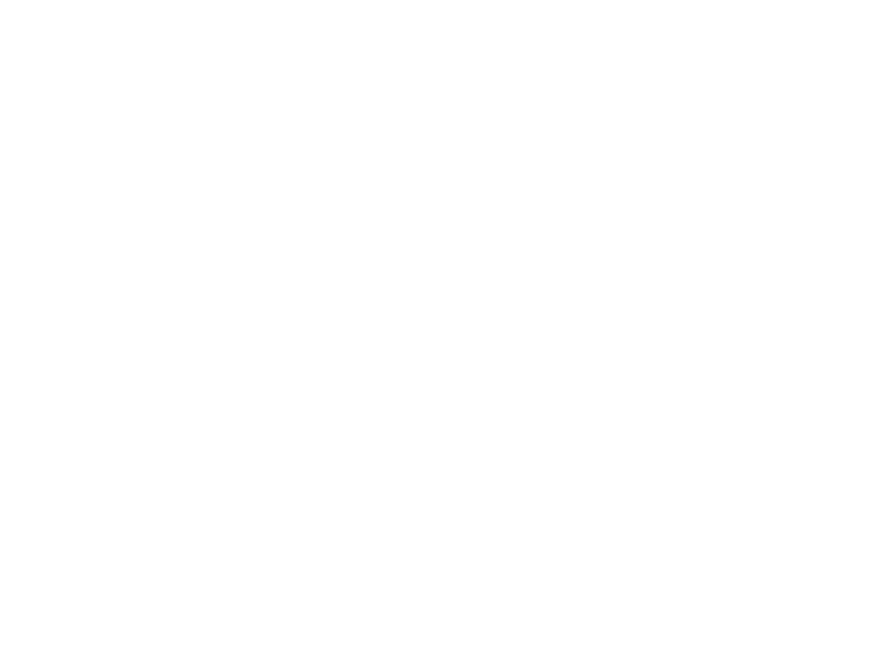

<IPython.core.display.Javascript object>


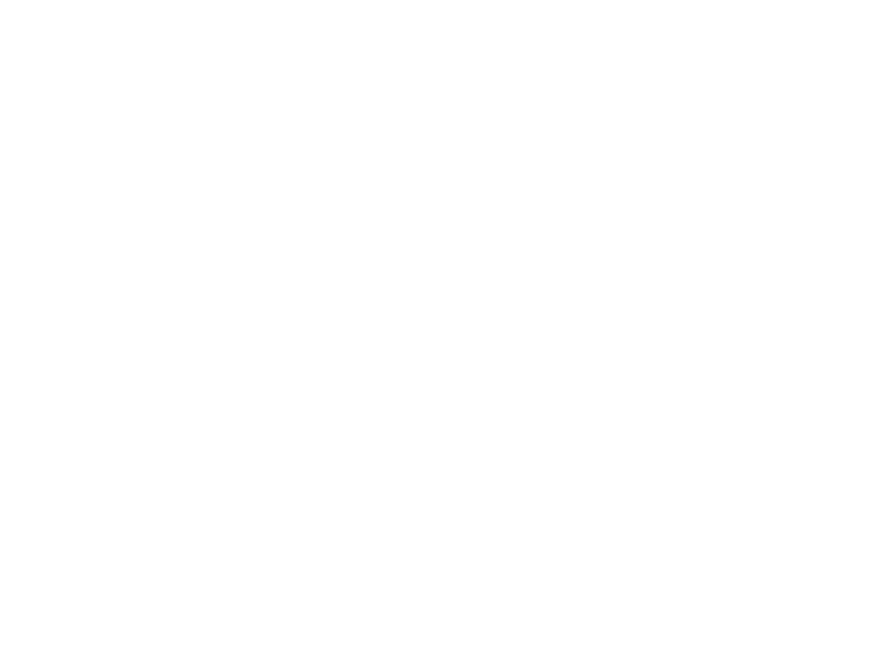

In [28]:
####### Scatter Plots of Energies############
Fig_32p, Axs_32p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_32p[r,j].scatter(Ener_main_comp_32p[:,0],Ener_main_comp_32p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_32p[r,j].legend()


Fig_32p1, Axs_32p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_32p1[r,j].scatter(Ener_main_comp_32p_noise[:,0],Ener_main_comp_32p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_32p1[r,j].legend()



In [29]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_32p=np.ndarray([dim_32p[2],dim_32p[2]])

R_pear_Ener_main_32p=np.corrcoef(Ener_main_comp_32p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_32p=np.ndarray([dim_32p[2],dim_32p[2]])
R_Spear_pval_Ener_main_32p=np.ndarray([dim_32p[2],dim_32p[2]])
R_Spear_Ener_main_32p=scs.spearmanr(Ener_main_comp_32p,axis=0)[0]
R_Spear_pval_Ener_main_32p=scs.spearmanr(Ener_main_comp_32p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [30]:
modIndex_32p=np.ndarray([dim_32p[2],dim_32p[3]])
for i in range(dim_32p[2]):
    for j in range(dim_32p[3]):
        modIndex_32p[i,j]=np.divide(np.sqrt(np.var(data_32p_baseline_removed[:,i,j])-np.mean(np.var(data_32p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_32p_baseline_removed[:,i,j]))


/tmp/ipykernel_2411/1100732818.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_32p[i,j]=np.divide(np.sqrt(np.var(data_32p_baseline_removed[:,i,j])-np.mean(np.var(data_32p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_32p_baseline_removed[:,i,j]))


## 64pulse integrated

In [24]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/64pul_Integrated/')

ar_64p=psr.Archive_load("All_64p.ar")
ar_64p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_64p
ar_64p.dedisperse()
ar_64p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_64p=ar_64p.get_data()
dim_64p=data_64p.shape

In [25]:
##################################################################################################################################################
## The current data_64p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_64p=np.ndarray([dim_64p[0],dim_64p[2]])
           ## Calculating baseline_64p as a function of frequency from data_64p######
for k in range(dim_64p[2]):
    for i in range(dim_64p[0]):
        baseline_64p[i,k]=np.mean(data_64p[i,0,k,800:1020])

In [26]:
## Removing baseline form data_64p
data_64p_baseline_removed=np.ndarray([dim_64p[0],dim_64p[2],dim_64p[3]])
for i in range(dim_64p[0]):
    for j in range(dim_64p[2]):
        data_64p_baseline_removed[i,j,:]=np.add(np.subtract(data_64p[i,0,j,:],baseline_64p[i,j]),1)

In [27]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_64p=np.ndarray([dim_64p[0],dim_64p[2]])

for i in range(dim_64p[0]):
    for j in range(dim_64p[2]):
        Ener_main_comp_64p[i,j]=np.divide(np.sum(data_64p[i,pol,j,300:420]-np.mean(data_64p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_64p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_64p_noise=np.ndarray([dim_64p[0],dim_64p[2]])

for i in range(dim_64p[0]):
    for j in range(dim_64p[2]):
        Ener_main_comp_64p_noise[i,j]=np.divide(np.sum(data_64p[i,pol,j,650:770]-np.mean(data_64p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_64p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


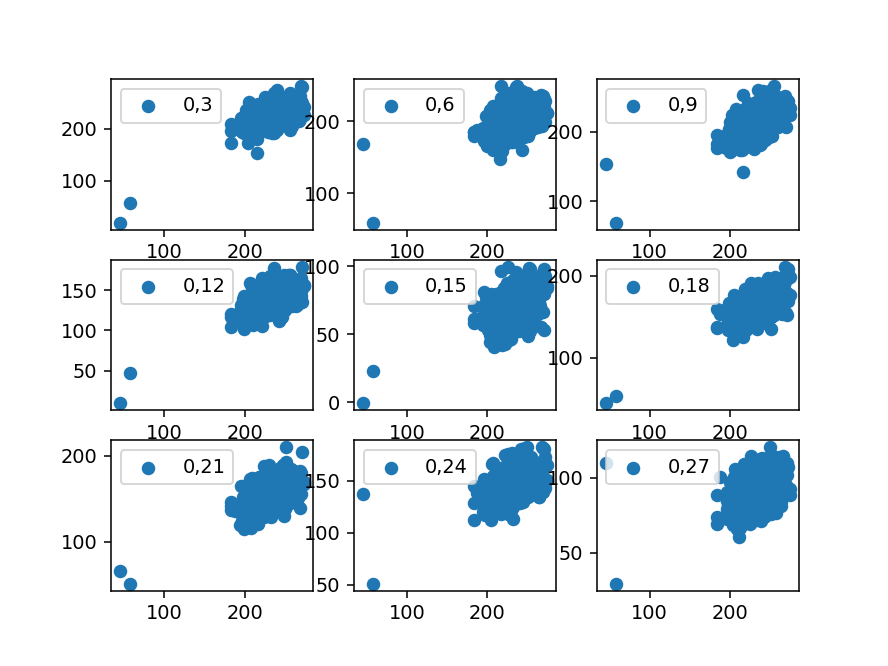

<IPython.core.display.Javascript object>


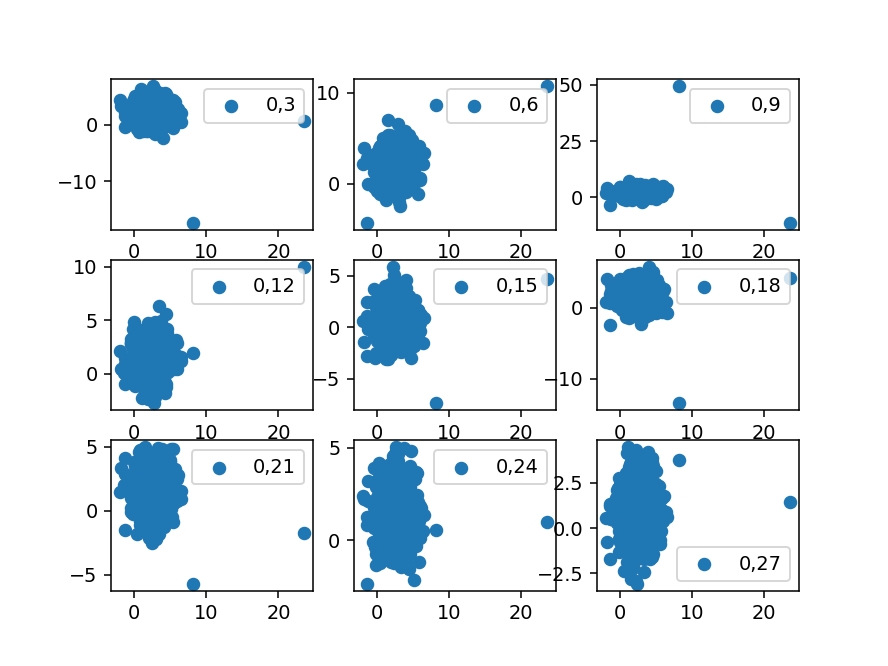

In [28]:
####### Scatter Plots of Energies############
Fig_64p, Axs_64p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_64p[r,j].scatter(Ener_main_comp_64p[:,0],Ener_main_comp_64p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_64p[r,j].legend()


Fig_64p1, Axs_64p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_64p1[r,j].scatter(Ener_main_comp_64p_noise[:,0],Ener_main_comp_64p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_64p1[r,j].legend()



In [29]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_64p=np.ndarray([dim_64p[2],dim_64p[2]])

R_pear_Ener_main_64p=np.corrcoef(Ener_main_comp_64p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_64p=np.ndarray([dim_64p[2],dim_64p[2]])
R_Spear_pval_Ener_main_64p=np.ndarray([dim_64p[2],dim_64p[2]])
R_Spear_Ener_main_64p=scs.spearmanr(Ener_main_comp_64p,axis=0)[0]
R_Spear_pval_Ener_main_64p=scs.spearmanr(Ener_main_comp_64p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [30]:
modIndex_64p=np.ndarray([dim_64p[2],dim_64p[3]])
for i in range(dim_64p[2]):
    for j in range(dim_64p[3]):
        modIndex_64p[i,j]=np.divide(np.sqrt(np.var(data_64p_baseline_removed[:,i,j])-np.mean(np.var(data_64p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_64p_baseline_removed[:,i,j]))


/tmp/ipykernel_13580/3397281544.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_64p[i,j]=np.divide(np.sqrt(np.var(data_64p_baseline_removed[:,i,j])-np.mean(np.var(data_64p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_64p_baseline_removed[:,i,j]))


##### Bootstrap for 64pulse

In [31]:
with NumpyRNGContext(1):   
    bootresult_64p = ast.bootstrap(Ener_main_comp_64p, 500)
    
R_Spear_Ener_main_64p_boot=np.ndarray([bootresult_64p.shape[0],bootresult_64p.shape[2],bootresult_64p.shape[2]])
for i in range(bootresult_64p.shape[0]):
    R_Spear_Ener_main_64p_boot[i,:,:]=scs.spearmanr(bootresult_64p[i,:,:],axis=0)[0]

## 128pulse integrated

In [38]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/128pul_Integrated/')

ar_128p=psr.Archive_load("All_128p.ar")
ar_128p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_128p
ar_128p.dedisperse()
ar_128p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_128p=ar_128p.get_data()
dim_128p=data_128p.shape

In [39]:
##################################################################################################################################################
## The current data_128p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_128p=np.ndarray([dim_128p[0],dim_128p[2]])
           ## Calculating baseline_128p as a function of frequency from data_128p######
for k in range(dim_128p[2]):
    for i in range(dim_128p[0]):
        baseline_128p[i,k]=np.mean(data_128p[i,0,k,800:1020])

In [40]:
## Removing baseline form data_128p
data_128p_baseline_removed=np.ndarray([dim_128p[0],dim_128p[2],dim_128p[3]])
for i in range(dim_128p[0]):
    for j in range(dim_128p[2]):
        data_128p_baseline_removed[i,j,:]=np.add(np.subtract(data_128p[i,0,j,:],baseline_128p[i,j]),1)

In [41]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_128p=np.ndarray([dim_128p[0],dim_128p[2]])

for i in range(dim_128p[0]):
    for j in range(dim_128p[2]):
        Ener_main_comp_128p[i,j]=np.divide(np.sum(data_128p[i,pol,j,300:420]-np.mean(data_128p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_128p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_128p_noise=np.ndarray([dim_128p[0],dim_128p[2]])

for i in range(dim_128p[0]):
    for j in range(dim_128p[2]):
        Ener_main_comp_128p_noise[i,j]=np.divide(np.sum(data_128p[i,pol,j,650:770]-np.mean(data_128p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_128p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


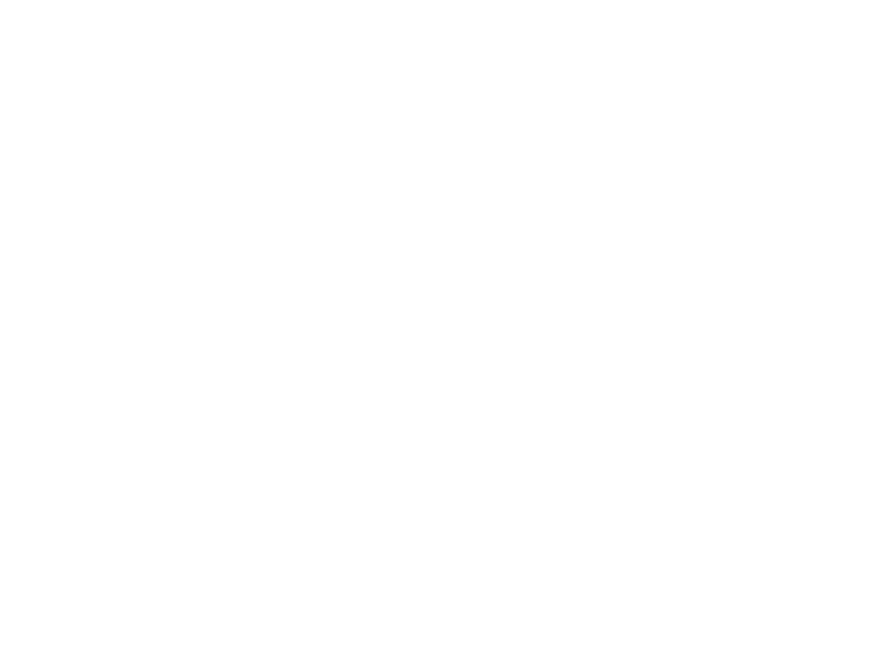

<IPython.core.display.Javascript object>


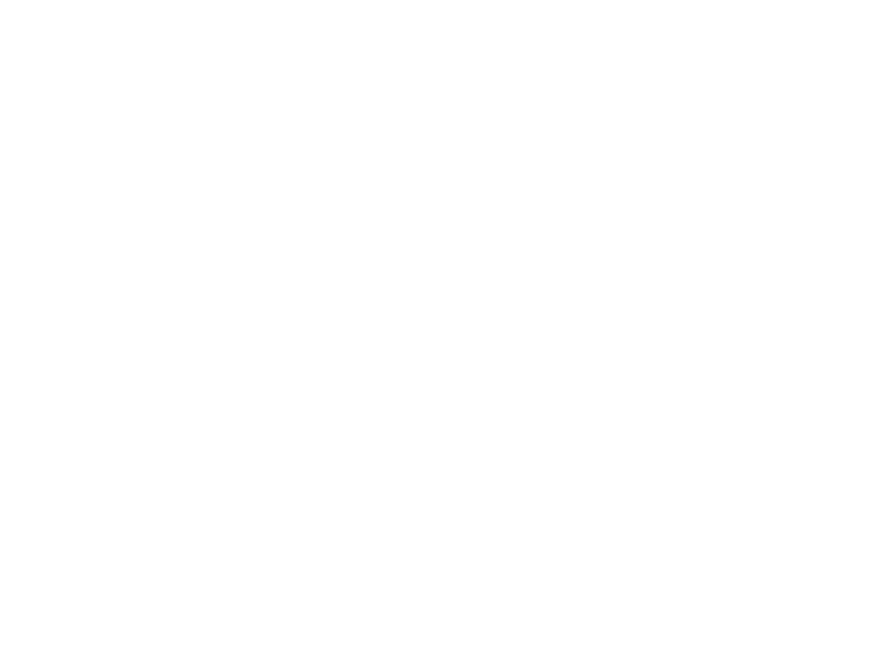

In [42]:
####### Scatter Plots of Energies############
Fig_128p, Axs_128p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_128p[r,j].scatter(Ener_main_comp_128p[:,0],Ener_main_comp_128p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_128p[r,j].legend()


Fig_128p1, Axs_128p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_128p1[r,j].scatter(Ener_main_comp_128p_noise[:,0],Ener_main_comp_128p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_128p1[r,j].legend()



In [43]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_128p=np.ndarray([dim_128p[2],dim_128p[2]])

R_pear_Ener_main_128p=np.corrcoef(Ener_main_comp_128p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_128p=np.ndarray([dim_128p[2],dim_128p[2]])
R_Spear_pval_Ener_main_128p=np.ndarray([dim_128p[2],dim_128p[2]])
R_Spear_Ener_main_128p=scs.spearmanr(Ener_main_comp_128p,axis=0)[0]
R_Spear_pval_Ener_main_128p=scs.spearmanr(Ener_main_comp_128p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [44]:
modIndex_128p=np.ndarray([dim_128p[2],dim_128p[3]])
for i in range(dim_128p[2]):
    for j in range(dim_128p[3]):
        modIndex_128p[i,j]=np.divide(np.sqrt(np.var(data_128p_baseline_removed[:,i,j])-np.mean(np.var(data_128p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_128p_baseline_removed[:,i,j]))


/tmp/ipykernel_2411/1520353824.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_128p[i,j]=np.divide(np.sqrt(np.var(data_128p_baseline_removed[:,i,j])-np.mean(np.var(data_128p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_128p_baseline_removed[:,i,j]))


## 256pulse integrated

In [32]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/256pul_Integrated/')

ar_256p=psr.Archive_load("All_256p.ar")
ar_256p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_256p
ar_256p.dedisperse()
ar_256p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_256p=ar_256p.get_data()
dim_256p=data_256p.shape

In [33]:
##################################################################################################################################################
## The current data_256p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_256p=np.ndarray([dim_256p[0],dim_256p[2]])
           ## Calculating baseline_256p as a function of frequency from data_256p######
for k in range(dim_256p[2]):
    for i in range(dim_256p[0]):
        baseline_256p[i,k]=np.mean(data_256p[i,0,k,800:1020])

In [34]:
## Removing baseline form data_256p
data_256p_baseline_removed=np.ndarray([dim_256p[0],dim_256p[2],dim_256p[3]])
for i in range(dim_256p[0]):
    for j in range(dim_256p[2]):
        data_256p_baseline_removed[i,j,:]=np.add(np.subtract(data_256p[i,0,j,:],baseline_256p[i,j]),1)

In [35]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_256p=np.ndarray([dim_256p[0],dim_256p[2]])

for i in range(dim_256p[0]):
    for j in range(dim_256p[2]):
        Ener_main_comp_256p[i,j]=np.divide(np.sum(data_256p[i,pol,j,300:420]-np.mean(data_256p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_256p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_256p_noise=np.ndarray([dim_256p[0],dim_256p[2]])

for i in range(dim_256p[0]):
    for j in range(dim_256p[2]):
        Ener_main_comp_256p_noise[i,j]=np.divide(np.sum(data_256p[i,pol,j,650:770]-np.mean(data_256p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_256p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


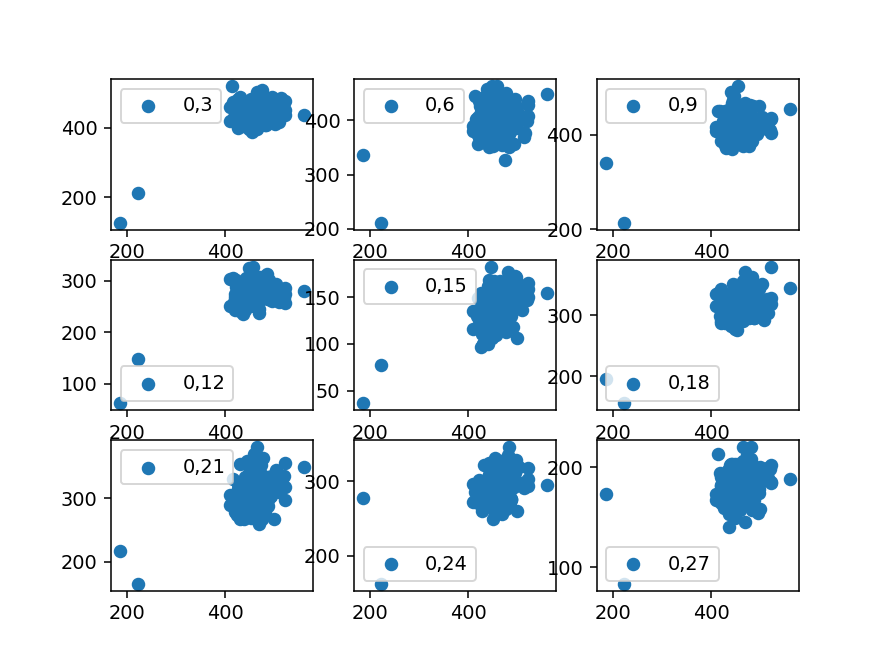

<IPython.core.display.Javascript object>


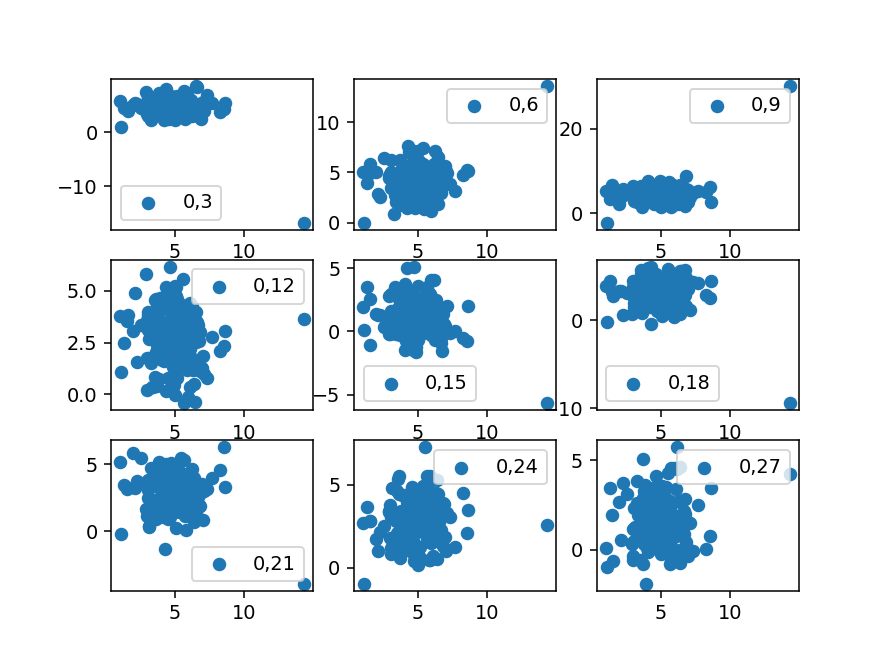

In [36]:
####### Scatter Plots of Energies############
Fig_256p, Axs_256p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_256p[r,j].scatter(Ener_main_comp_256p[:,0],Ener_main_comp_256p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_256p[r,j].legend()


Fig_256p1, Axs_256p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_256p1[r,j].scatter(Ener_main_comp_256p_noise[:,0],Ener_main_comp_256p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_256p1[r,j].legend()



In [37]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_256p=np.ndarray([dim_256p[2],dim_256p[2]])

R_pear_Ener_main_256p=np.corrcoef(Ener_main_comp_256p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_256p=np.ndarray([dim_256p[2],dim_256p[2]])
R_Spear_pval_Ener_main_256p=np.ndarray([dim_256p[2],dim_256p[2]])
R_Spear_Ener_main_256p=scs.spearmanr(Ener_main_comp_256p,axis=0)[0]
R_Spear_pval_Ener_main_256p=scs.spearmanr(Ener_main_comp_256p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [38]:
modIndex_256p=np.ndarray([dim_256p[2],dim_256p[3]])
for i in range(dim_256p[2]):
    for j in range(dim_256p[3]):
        modIndex_256p[i,j]=np.divide(np.sqrt(np.var(data_256p_baseline_removed[:,i,j])-np.mean(np.var(data_256p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_256p_baseline_removed[:,i,j]))


/tmp/ipykernel_13580/1348309986.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_256p[i,j]=np.divide(np.sqrt(np.var(data_256p_baseline_removed[:,i,j])-np.mean(np.var(data_256p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_256p_baseline_removed[:,i,j]))


##### Bootstrap for 256pulse

In [39]:
with NumpyRNGContext(1):   
    bootresult_256p = ast.bootstrap(Ener_main_comp_256p, 500)
    
R_Spear_Ener_main_256p_boot=np.ndarray([bootresult_256p.shape[0],bootresult_256p.shape[2],bootresult_256p.shape[2]])
for i in range(bootresult_256p.shape[0]):
    R_Spear_Ener_main_256p_boot[i,:,:]=scs.spearmanr(bootresult_256p[i,:,:],axis=0)[0]

## 512pulse integrated

In [52]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/512pul_Integrated/')

ar_512p=psr.Archive_load("All_512p.ar")
ar_512p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_512p
ar_512p.dedisperse()
ar_512p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_512p=ar_512p.get_data()
dim_512p=data_512p.shape

In [53]:
##################################################################################################################################################
## The current data_512p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_512p=np.ndarray([dim_512p[0],dim_512p[2]])
           ## Calculating baseline_512p as a function of frequency from data_512p######
for k in range(dim_512p[2]):
    for i in range(dim_512p[0]):
        baseline_512p[i,k]=np.mean(data_512p[i,0,k,800:1020])

In [54]:
## Removing baseline form data_512p
data_512p_baseline_removed=np.ndarray([dim_512p[0],dim_512p[2],dim_512p[3]])
for i in range(dim_512p[0]):
    for j in range(dim_512p[2]):
        data_512p_baseline_removed[i,j,:]=np.add(np.subtract(data_512p[i,0,j,:],baseline_512p[i,j]),1)

In [55]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_512p=np.ndarray([dim_512p[0],dim_512p[2]])

for i in range(dim_512p[0]):
    for j in range(dim_512p[2]):
        Ener_main_comp_512p[i,j]=np.divide(np.sum(data_512p[i,pol,j,300:420]-np.mean(data_512p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_512p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_512p_noise=np.ndarray([dim_512p[0],dim_512p[2]])

for i in range(dim_512p[0]):
    for j in range(dim_512p[2]):
        Ener_main_comp_512p_noise[i,j]=np.divide(np.sum(data_512p[i,pol,j,650:770]-np.mean(data_512p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_512p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


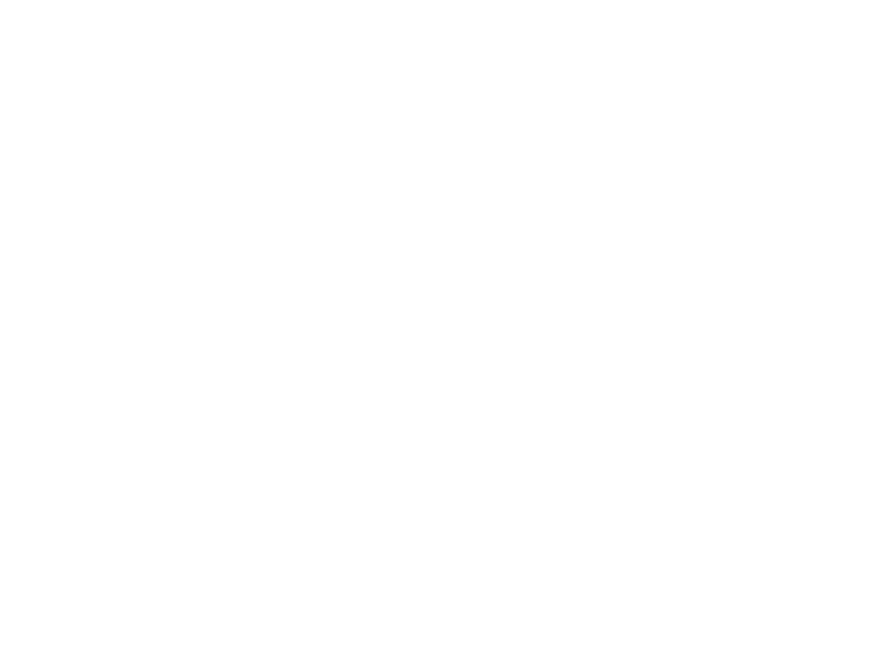

<IPython.core.display.Javascript object>


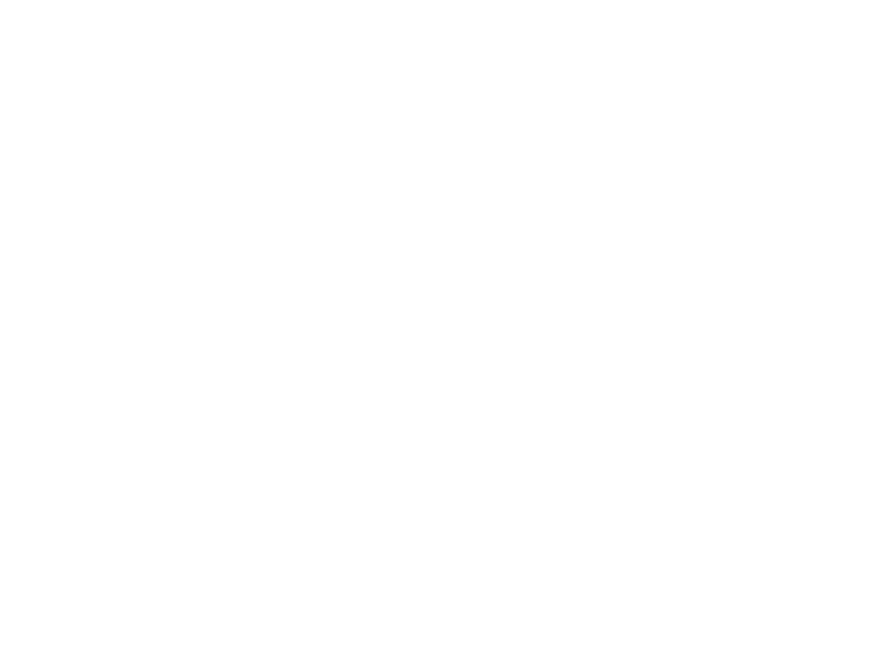

In [56]:
####### Scatter Plots of Energies############
Fig_512p, Axs_512p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_512p[r,j].scatter(Ener_main_comp_512p[:,0],Ener_main_comp_512p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_512p[r,j].legend()


Fig_512p1, Axs_512p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_512p1[r,j].scatter(Ener_main_comp_512p_noise[:,0],Ener_main_comp_512p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_512p1[r,j].legend()



In [57]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_512p=np.ndarray([dim_512p[2],dim_512p[2]])

R_pear_Ener_main_512p=np.corrcoef(Ener_main_comp_512p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_512p=np.ndarray([dim_512p[2],dim_512p[2]])
R_Spear_pval_Ener_main_512p=np.ndarray([dim_512p[2],dim_512p[2]])
R_Spear_Ener_main_512p=scs.spearmanr(Ener_main_comp_512p,axis=0)[0]
R_Spear_pval_Ener_main_512p=scs.spearmanr(Ener_main_comp_512p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [58]:
modIndex_512p=np.ndarray([dim_512p[2],dim_512p[3]])
for i in range(dim_512p[2]):
    for j in range(dim_512p[3]):
        modIndex_512p[i,j]=np.divide(np.sqrt(np.var(data_512p_baseline_removed[:,i,j])-np.mean(np.var(data_512p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_512p_baseline_removed[:,i,j]))


/tmp/ipykernel_2411/3297666392.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_512p[i,j]=np.divide(np.sqrt(np.var(data_512p_baseline_removed[:,i,j])-np.mean(np.var(data_512p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_512p_baseline_removed[:,i,j]))


## 1024pulse integrated

In [40]:
cwd = os.getcwd()
os.chdir('/fred/oz005/users/akulkarn/J0437-4715/J0437-4715_meerkat_19May_22/Processed/Frequency_Appended_all_withK/Corrected_DM/1024pul_Integrated/')

ar_1024p=psr.Archive_load("All_1024p.ar")
ar_1024p.set_dispersion_measure(2.64161357856353) ## Dispersion measure obtained from timing analysis of 8 sec inegrated data_1024p
ar_1024p.dedisperse()
ar_1024p.pscrunch()   ## Doing analysis on Total intensity
pol=0
data_1024p=ar_1024p.get_data()
dim_1024p=data_1024p.shape

In [41]:
##################################################################################################################################################
## The current data_1024p does not seem to be bandpass calibrated and hence the bandpas is not flattended. 
baseline_1024p=np.ndarray([dim_1024p[0],dim_1024p[2]])
           ## Calculating baseline_1024p as a function of frequency from data_1024p######
for k in range(dim_1024p[2]):
    for i in range(dim_1024p[0]):
        baseline_1024p[i,k]=np.mean(data_1024p[i,0,k,800:1020])

In [42]:
## Removing baseline form data_1024p
data_1024p_baseline_removed=np.ndarray([dim_1024p[0],dim_1024p[2],dim_1024p[3]])
for i in range(dim_1024p[0]):
    for j in range(dim_1024p[2]):
        data_1024p_baseline_removed[i,j,:]=np.add(np.subtract(data_1024p[i,0,j,:],baseline_1024p[i,j]),1)

In [43]:
###### Defining the matrix of Energy component [Subint,Freq]
Ener_main_comp_1024p=np.ndarray([dim_1024p[0],dim_1024p[2]])

for i in range(dim_1024p[0]):
    for j in range(dim_1024p[2]):
        Ener_main_comp_1024p[i,j]=np.divide(np.sum(data_1024p[i,pol,j,300:420]-np.mean(data_1024p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_1024p[i,pol,j,800:1020])))

## Defining matrix of Energy componets for noise [Subint,Freq]
Ener_main_comp_1024p_noise=np.ndarray([dim_1024p[0],dim_1024p[2]])

for i in range(dim_1024p[0]):
    for j in range(dim_1024p[2]):
        Ener_main_comp_1024p_noise[i,j]=np.divide(np.sum(data_1024p[i,pol,j,650:770]-np.mean(data_1024p[i,pol,j,800:1020])),np.multiply(np.sqrt(120),np.std(data_1024p[i,pol,j,800:1020])))


<IPython.core.display.Javascript object>


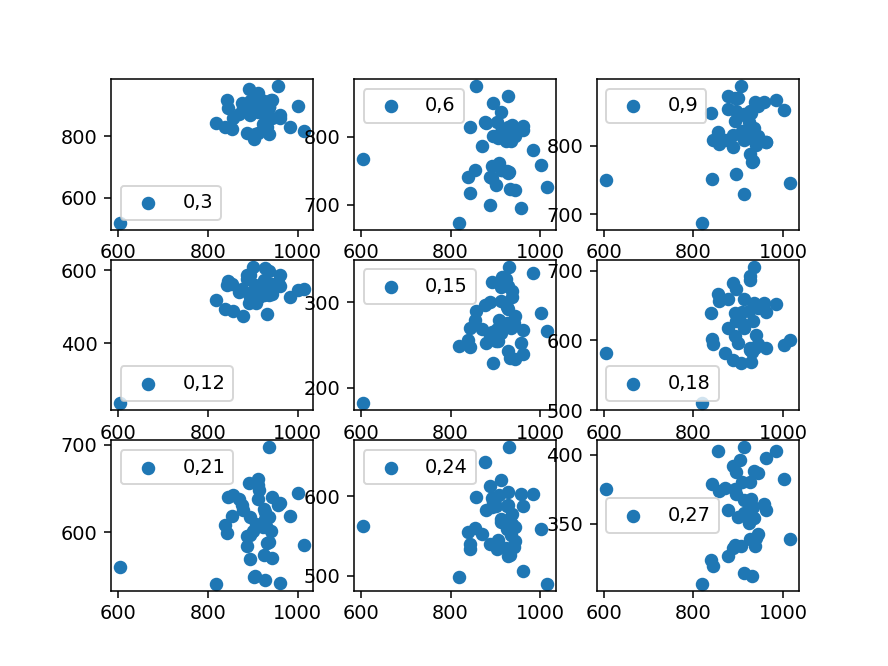

<IPython.core.display.Javascript object>


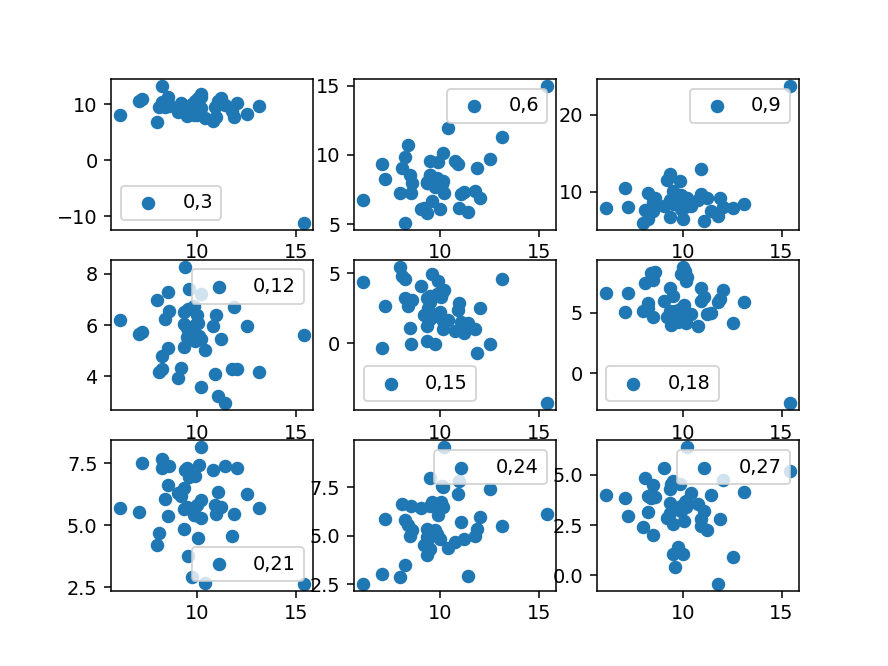

In [44]:
####### Scatter Plots of Energies############
Fig_1024p, Axs_1024p = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_1024p[r,j].scatter(Ener_main_comp_1024p[:,0],Ener_main_comp_1024p[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_1024p[r,j].legend()


Fig_1024p1, Axs_1024p1 = plt.subplots(nrows=3,ncols=3)

for r in range(3):
    for j in range(3):
        Axs_1024p1[r,j].scatter(Ener_main_comp_1024p_noise[:,0],Ener_main_comp_1024p_noise[:,9*r+3*j+3],label='0,'+str(9*r+3*j+3))
        Axs_1024p1[r,j].legend()



In [45]:
##########Calculating Pearson Correlation coefficient across frequency #############
R_pear_Ener_main_1024p=np.ndarray([dim_1024p[2],dim_1024p[2]])

R_pear_Ener_main_1024p=np.corrcoef(Ener_main_comp_1024p,rowvar=False)

### Generating Spearman Correlation Coefficient
R_Spear_Ener_main_1024p=np.ndarray([dim_1024p[2],dim_1024p[2]])
R_Spear_pval_Ener_main_1024p=np.ndarray([dim_1024p[2],dim_1024p[2]])
R_Spear_Ener_main_1024p=scs.spearmanr(Ener_main_comp_1024p,axis=0)[0]
R_Spear_pval_Ener_main_1024p=scs.spearmanr(Ener_main_comp_1024p,axis=0)[1]

### CALCULATING MODULATION INDEX

In [46]:
modIndex_1024p=np.ndarray([dim_1024p[2],dim_1024p[3]])
for i in range(dim_1024p[2]):
    for j in range(dim_1024p[3]):
        modIndex_1024p[i,j]=np.divide(np.sqrt(np.var(data_1024p_baseline_removed[:,i,j])-np.mean(np.var(data_1024p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_1024p_baseline_removed[:,i,j]))


/tmp/ipykernel_13580/1613916254.py:4: RuntimeWarning: invalid value encountered in sqrt
  modIndex_1024p[i,j]=np.divide(np.sqrt(np.var(data_1024p_baseline_removed[:,i,j])-np.mean(np.var(data_1024p_baseline_removed[:,i,800:1020],axis=1))),np.mean(data_1024p_baseline_removed[:,i,j]))


##### Bootstrap for 1024pulse

In [47]:
with NumpyRNGContext(1):   
    bootresult_1024p = ast.bootstrap(Ener_main_comp_1024p, 500)
    
R_Spear_Ener_main_1024p_boot=np.ndarray([bootresult_1024p.shape[0],bootresult_1024p.shape[2],bootresult_1024p.shape[2]])
for i in range(bootresult_1024p.shape[0]):
    R_Spear_Ener_main_1024p_boot[i,:,:]=scs.spearmanr(bootresult_1024p[i,:,:],axis=0)[0]

In [ ]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(R_pear_Ener_main_4p[0,:],label='4p')
plt.plot(R_pear_Ener_main_8p[0,:],label='8p')
plt.plot(R_pear_Ener_main_16p[0,:],label='16p')
plt.plot(R_pear_Ener_main_32p[0,:],label='32p')
plt.plot(R_pear_Ener_main_64p[0,:],label='64p')
plt.plot(R_pear_Ener_main_128p[0,:],label='128p')
plt.plot(R_pear_Ener_main_256p[0,:],label='256p')
#plt.plot(R_pear_Ener_main_512p[0,:],label='512p')
#plt.plot(R_pear_Ener_main_1024p[0,:],label='1024p')
plt.title('Pearson')
plt.legend()

plt.subplot(2,1,2)
plt.plot(R_Spear_Ener_main_4p[0,:],label='4p')
plt.plot(R_Spear_Ener_main_8p[0,:],label='8p')
plt.plot(R_Spear_Ener_main_16p[0,:],label='16p')
plt.plot(R_Spear_Ener_main_32p[0,:],label='32p')
plt.plot(R_Spear_Ener_main_64p[0,:],label='64p')
plt.plot(R_Spear_Ener_main_128p[0,:],label='128p')
plt.plot(R_Spear_Ener_main_256p[0,:],label='256p')
#plt.plot(R_Spear_Ener_main_512p[0,:],label='512p')
#plt.plot(R_Spear_Ener_main_1024p[0,:],label='1024p')
plt.title('Spearman')
plt.legend()

#plt.figure()
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_4p[0,1:32],label='4p')
##plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_8p[0,1:32],label='8p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_16p[0,1:32],label='16p')
##plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_32p[0,1:32],label='32p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_64p[0,1:32],label='64p')
##plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_128p[0,1:32],label='128p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_256p[0,1:32],label='256p')
##plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_512p[0,1:32],label='512p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_1024p[0,1:32],label='1024p')
#plt.xlabel('Frequency Channels')
#plt.title('Spearman Correlation')
#plt.legend()

<IPython.core.display.Javascript object>


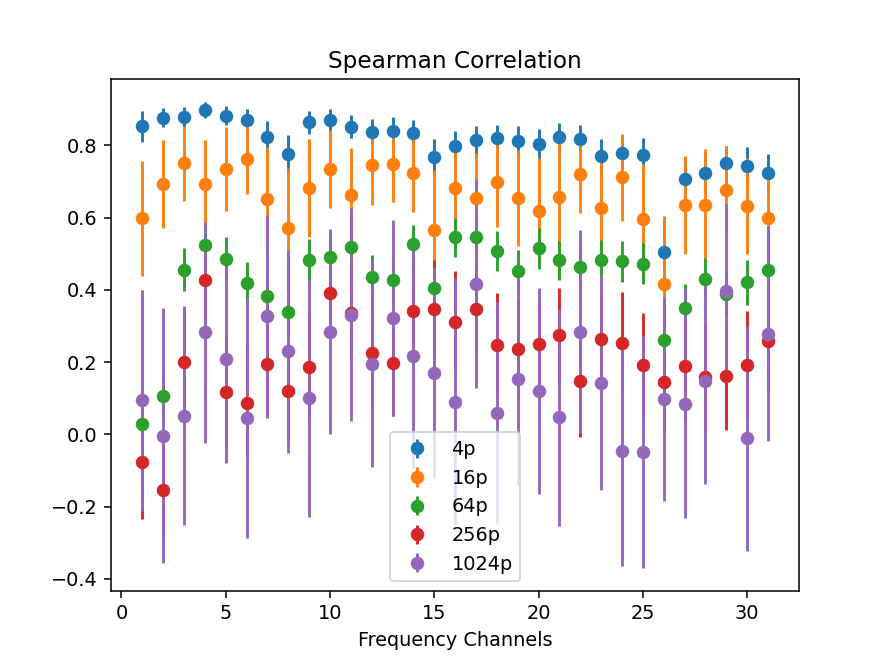

In [49]:
plt.figure()
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_4p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_4p_boot[:,0,1:32],axis=0)),fmt='o',label='4p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_8p[0,1:32],label='8p')
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_16p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_16p_boot[:,0,1:32],axis=0)),fmt='o',label='16p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_32p[0,1:32],label='32p')
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_64p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_64p_boot[:,0,1:32],axis=0)),fmt='o',label='64p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_128p[0,1:32],label='128p')
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_256p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_256p_boot[:,0,1:32],axis=0)),fmt='o',label='256p')
#plt.plot(np.linspace(1,31,num=31),R_Spear_Ener_main_512p[0,1:32],label='512p')
plt.errorbar(np.linspace(1,31,num=31),np.mean(R_Spear_Ener_main_1024p_boot[:,0,1:32],axis=0),yerr=1.96*(np.std(R_Spear_Ener_main_1024p_boot[:,0,1:32],axis=0)),fmt='o',label='1024p')
plt.xlabel('Frequency Channels')
plt.title('Spearman Correlation')
plt.legend()